# Création du model de machine learning


#### Étude des variations journalière des données historiques entre le prix le plus haut et le prix le plus bas pour chaque jour afin de mesurer la volatilité du marché dans le but de prédire le prix à la fermeture de chaque bougie.


- utilisation de méthode de régression linéaire de l'apprentissage supervisé

- calcule de la variation entre le prix le plus haut et le plus bas pour chaque période de temps (chaque bougie dans notre cas)

- utilisation de la variable 'close' comme valeur cible(étiquette) dans les données d'apprentissage supervisé


#### Définition des valeurs explicatives (caractéristiques)


- Prix d'ouverture (open)

- Prix le plus haut (high)

- Prix le plus bas (low)

- Prix auquel la paire de trading a été échangée à la fin de cette bougie (close )

- Volume de transactions (volume)


#### Définition de la valeur cible (étiquette)


La valeur cible sera la variable 'close' indiquant le prix de fermeture


#### Prépocessing


In [27]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [28]:
# MongoClient pour interagir avec MongoDB
from pymongo import MongoClient

# authentification à MongoDB
# définition des informations d'identification nécessaires
# pour s'authentifier auprès de MongoDB en local
mongo_user = "admin"
mongo_password = "pass"
mongo_host = "localhost"
mongo_port = 27017


# connexion à la base de données MongoDB
client = MongoClient(
    f"mongodb://{mongo_user}:{mongo_password}@{mongo_host}:{mongo_port}/"
)

# sélection de la base de données
db = client["extract_data_binance"]

# sélection de la collection
collection = db["historical_data"]

In [29]:
# récupération des données de la collection
# et stockage dans un DataFrame
df = pd.DataFrame(list(collection.find()))

# affichage de la taille du dataframe
df.shape

(21074, 8)

In [30]:
# affichage des 5 premières lignes
df.head()

,_id,symbol,timestamp,open,high,low,close,volume
0,6606cb26913b751b5db45c83,BTCUSDT,2020-03-30 14:00:00,6302.64,6444.00,6260.62,6343.58,13357.818104
1,6606cb26913b751b5db45c84,BTCUSDT,2020-03-30 16:00:00,6343.90,6389.72,6303.34,6350.46,7370.439233
2,6606cb26913b751b5db45c85,BTCUSDT,2020-03-30 18:00:00,6350.01,6402.41,6322.49,6366.74,4635.472736
3,6606cb26913b751b5db45c86,BTCUSDT,2020-03-30 20:00:00,6366.50,6564.33,6363.78,6528.47,13477.664947
4,6606cb26913b751b5db45c87,BTCUSDT,2020-03-30 22:00:00,6529.24,6599.00,6375.00,6394.38,11893.750395


In [31]:
# vérification des doublons
doublons = df.duplicated().sum()
print(f"le dataframe contient {doublons} doublons")

le dataframe contient 0 doublons


In [32]:
# vérification des valeurs manquantes
display(df.isna().sum())

_id          0
symbol       0
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [33]:
# vérification des types de données
df.dtypes

_id                  object
symbol               object
timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
dtype: object

In [34]:
# description des statistiques quantitatives
df.describe()

,timestamp,open,high,low,close,volume
count,21074,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000
mean,2021-12-18 16:04:42.547214592,28161.458435,28353.038322,27957.564836,28165.517593,7557.755497
min,2020-03-30 14:00:00,6194.560000,6220.000000,6150.110000,6194.570000,0.000000
25%,2020-10-24 06:00:00,12967.740000,13016.180000,12914.170000,12968.520000,2750.543353
50%,2021-11-02 13:00:00,26286.305000,26421.260000,26173.190000,26297.110000,4550.663432
75%,2023-01-15 13:30:00,40282.862500,40600.000000,39928.130000,40284.792500,8426.876109
max,2024-03-29 14:00:00,73349.240000,73777.000000,73156.000000,73349.240000,205830.298030
std,NaN,16040.344274,16166.856105,15904.545129,16041.434348,9100.873438


In [35]:
# calcul du nombre de modalité(valeurs différentes)pour chaque variable explicative
modalite_par_variable = df.nunique()

# affichage des modalités
print(modalite_par_variable)

_id          21074
symbol           1
timestamp    17513
open         17441
high         16651
low          16752
close        17430
volume       17513
dtype: int64


#### Calcul du taux de variation journalier entre le prix le plus haut et le prix le plus bas pour chaque jour afin de mesurer la volatilité du marché

- la volatilité du marché est une mesure statistique de la dispersion des rendements pour un titre ou un marché donné.

- plus la volatilité est élevée, plus le titre est risqué.


In [36]:
# calcul du taux de variation journalier entre le prix le plus haut et le prix le plus bas
df["taux_variation"] = (df["high"] - df["low"]) / df["low"] * 100


# affichage des 5 premières lignes
df.head()

,_id,symbol,timestamp,open,high,low,close,volume,taux_variation
0,6606cb26913b751b5db45c83,BTCUSDT,2020-03-30 14:00:00,6302.64,6444.00,6260.62,6343.58,13357.818104,2.929103
1,6606cb26913b751b5db45c84,BTCUSDT,2020-03-30 16:00:00,6343.90,6389.72,6303.34,6350.46,7370.439233,1.370385
2,6606cb26913b751b5db45c85,BTCUSDT,2020-03-30 18:00:00,6350.01,6402.41,6322.49,6366.74,4635.472736,1.264059
3,6606cb26913b751b5db45c86,BTCUSDT,2020-03-30 20:00:00,6366.50,6564.33,6363.78,6528.47,13477.664947,3.151429
4,6606cb26913b751b5db45c87,BTCUSDT,2020-03-30 22:00:00,6529.24,6599.00,6375.00,6394.38,11893.750395,3.513725


In [37]:
# vérification des valeurs manquantes
display(df.isna().sum())

_id               0
symbol            0
timestamp         0
open              0
high              0
low               0
close             0
volume            0
taux_variation    0
dtype: int64

In [38]:
# suppression des colonnes non nécessaire au machine learning
# "timestamp" car nous avons effectué le calcul de la variation journalière
# "_id" car c'est un identifiant unique
# "symbol" car nous avons un seul symbole
df = df.drop(["timestamp", "_id", "symbol"], axis=1)

# affichage pour vérification
df.head()

,open,high,low,close,volume,taux_variation
0,6302.64,6444.00,6260.62,6343.58,13357.818104,2.929103
1,6343.90,6389.72,6303.34,6350.46,7370.439233,1.370385
2,6350.01,6402.41,6322.49,6366.74,4635.472736,1.264059
3,6366.50,6564.33,6363.78,6528.47,13477.664947,3.151429
4,6529.24,6599.00,6375.00,6394.38,11893.750395,3.513725


In [39]:
# séparation de la variable cible des variables explicatives
feats = df.drop("close", axis=1)
target = df["close"]

# affichage pour vérification
feats.head()
target.head()

0    6343.58
1    6350.46
2    6366.74
3    6528.47
4    6394.38
Name: close, dtype: float64

In [40]:
# importation de la fonction train_test_split
# pour séparer le jeu de données en données d'entraînement et données de test
from sklearn.model_selection import train_test_split

# séparation du jeu d'entrainement et du jeu de test
X_train, X_test, y_train, y_test = train_test_split(
    feats, target, test_size=0.20, random_state=42
)

# vérification des tailles du jeu de données
print("train Set:", X_train.shape)
print("test Set:", X_test.shape)

train Set: (16859, 5)
test Set: (4215, 5)


In [41]:
# vérification du type des variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21074 entries, 0 to 21073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            21074 non-null  float64
 1   high            21074 non-null  float64
 2   low             21074 non-null  float64
 3   close           21074 non-null  float64
 4   volume          21074 non-null  float64
 5   taux_variation  21074 non-null  float64
dtypes: float64(6)
memory usage: 988.0 KB


In [42]:
df.head()

,open,high,low,close,volume,taux_variation
0,6302.64,6444.00,6260.62,6343.58,13357.818104,2.929103
1,6343.90,6389.72,6303.34,6350.46,7370.439233,1.370385
2,6350.01,6402.41,6322.49,6366.74,4635.472736,1.264059
3,6366.50,6564.33,6363.78,6528.47,13477.664947,3.151429
4,6529.24,6599.00,6375.00,6394.38,11893.750395,3.513725


In [43]:
# il n'y a pas de variables catégorielles donc pas besoin de faire de séparation entre les variables numériques et catégorielles

In [44]:
# affichage vérifications des valeurs manquantes
# dans les jeux de données d'entraînement et de test
# des variables explicatives
print("valeurs manquantes dans X_train:")
print(X_train.isna().sum())

print("valeurs manquantes dans X_test:")
print(X_test.isna().sum())

# affichage vérifications des valeurs manquantes
# dans les jeux de données d'entraînement
# et de test de la cible
print("valeurs manquantes dans y_train:")
print(y_train.isna().sum())

print("valeurs manquantes dans y_test:")
print(y_test.isna().sum())

valeurs manquantes dans X_train:
open              0
high              0
low               0
volume            0
taux_variation    0
dtype: int64
valeurs manquantes dans X_test:
open              0
high              0
low               0
volume            0
taux_variation    0
dtype: int64
valeurs manquantes dans y_train:
0
valeurs manquantes dans y_test:
0


In [45]:
# importation de la classe LinearRegression
from sklearn.linear_model import LinearRegression

# initialisation du modèle de régression linéaire
regressor = LinearRegression()

# entrainement du modèle de régression linéaire
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
# évaluation de la performance du modèle

# définition de la fonction de calcul du coefficient de détermination R2
coeffs = list(regressor.coef_)
# ajout du coefficient de l'ordonnée à l'origine
coeffs.insert(0, regressor.intercept_)

# création d'un dataframe pour afficher les coefficients
feats2 = list(feats.columns)
# ajout de l'ordonnée à l'origine
feats2.insert(0, "intercept")

# création d'un dataframe pour afficher les coefficients
pd.DataFrame({"valeur estimée": coeffs}, index=feats2)

,valeur estimée
intercept,20.531252
open,-0.424842
high,0.833378
low,0.589998
volume,-0.000396
taux_variation,-8.760679


In [47]:
# affichage du coefficient de détermination R2 sur le jeu d'entraînement
print(
    "Coefficient de détermination du modèle sur train:",
    regressor.score(X_train, y_train),
)

# affichage du coefficient de détermination R2 sur le jeu de test
print(
    "Coefficient de détermination du modèle sur test:",
    regressor.score(X_test, y_test),
)

Coefficient de détermination du modèle sur train: 0.9999131099567911
Coefficient de détermination du modèle sur test: 0.9999221769126565


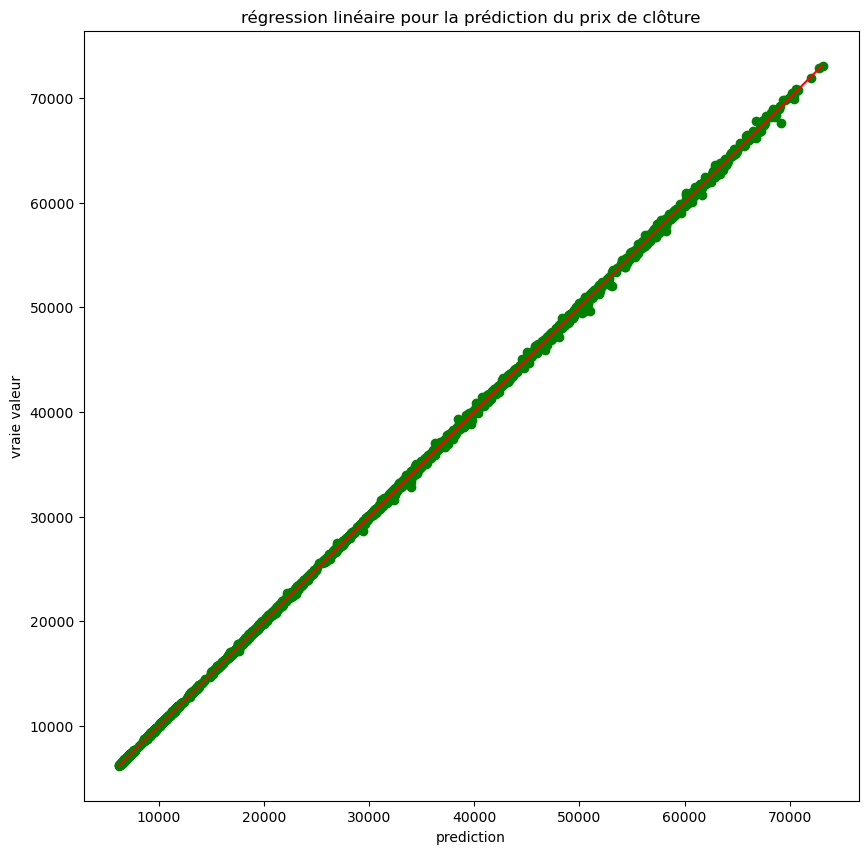

In [48]:
# importation de matplotlib pour la visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# création d'une figure pour afficher le nuage de points
fig = plt.figure(figsize=(10, 10))

# instanciation de l'objet LinearRegression, apprentissage et prédiction
pred_test = regressor.predict(X_test_clean)

# création d'un nuage de points pour afficher les prédictions
plt.scatter(pred_test, y_test, c="green")

# affichage de la droite d'équation y = x par dessus le nuage de points
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color="red")

# ajout de titre et de labels
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title("régression linéaire pour la prédiction du prix de clôture")

# affichage du graphique
plt.show()

Prédictions :


In [49]:
# définition d'une pipeline pour le prétraitement des données
from sklearn.pipeline import Pipeline


# définition des étapes de la pipeline
steps = []

# création de la pipeline
pipeline = Pipeline(steps)